# Experiments

Run this notebook to reproduce the experiments from the paper. 

In [1]:
import math
import gudhi
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from miniball import Miniball
from scipy.spatial import KDTree

from datasets import sample_circle, sample_rectangle, sample_torus, sample_cube
from core import alpha_core

import warnings

warnings.filterwarnings('ignore')

In [2]:
rng = np.random.default_rng(seed=0)

## Three circles with noise

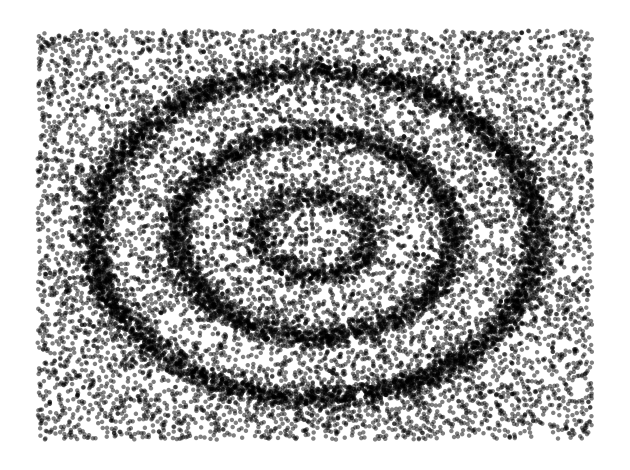

In [3]:
N1 = 5000
N2 = 3000
N3 = 1000
M = 10_000

Z1 = sample_circle(N1, rng, r=0.8, variance=0.001)
Z2 = sample_circle(N2, rng, r=0.5, variance=0.001)
Z3 = sample_circle(N3, rng, r=0.2, variance=0.001)

Y = sample_rectangle(M, rng)
X = np.r_[Z1, Z2, Z3, Y]
plt.scatter(*X.T, s=10, color="black", alpha=0.5, edgecolor="none")
plt.gca().axis("off")
plt.tight_layout()
plt.show()

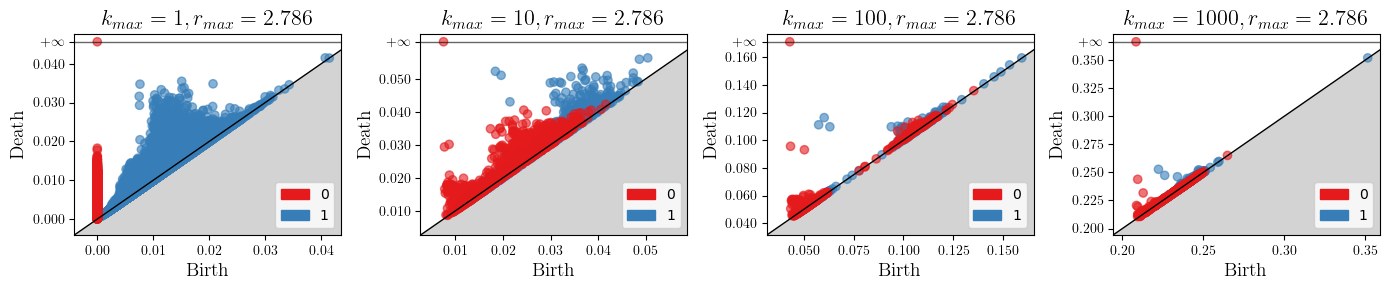

In [4]:
max_ks = [1, 10, 100, 1000]
max_r = 2*math.sqrt(Miniball(X).squared_radius())

plt.rcParams['text.usetex'] = True
params = {'mathtext.default': 'regular' }
fig, axs = plt.subplots(ncols=len(max_ks), figsize=(14, 14 // len(max_ks)))
for i, max_k in enumerate(max_ks):
    st_alpha_core = alpha_core(points=X, k=max_k, max_r=max_r)
    gudhi.plot_persistence_diagram(st_alpha_core.persistence(), axes=axs[i], fontsize=14)
    axs[i].set_title(r"$k_{max}=" + f"{max_k}, " + r"r_{max}=" + f"{max_r:.3f}$", fontsize=16)
fig.tight_layout()
plt.show()

## Torus with noise

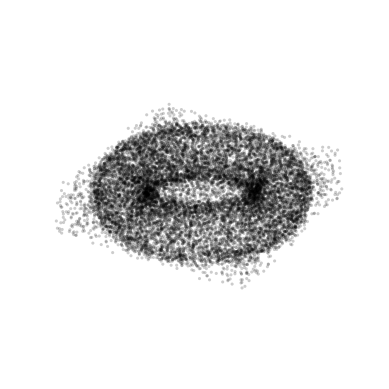

In [5]:
N = 10_000
M = 5_000

Z = sample_torus(N, rng, variance=0.001)
Y = sample_cube(M, rng, lower_left_corner=(-1, -1, -0.25), upper_right_corner=(1, 1, 0.25))
X = np.r_[Z, Y]

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(*X.T, alpha=0.2, color="black", s=5, edgecolor="none")
ax.set_aspect("equal")
ax.axis("off")
plt.show()

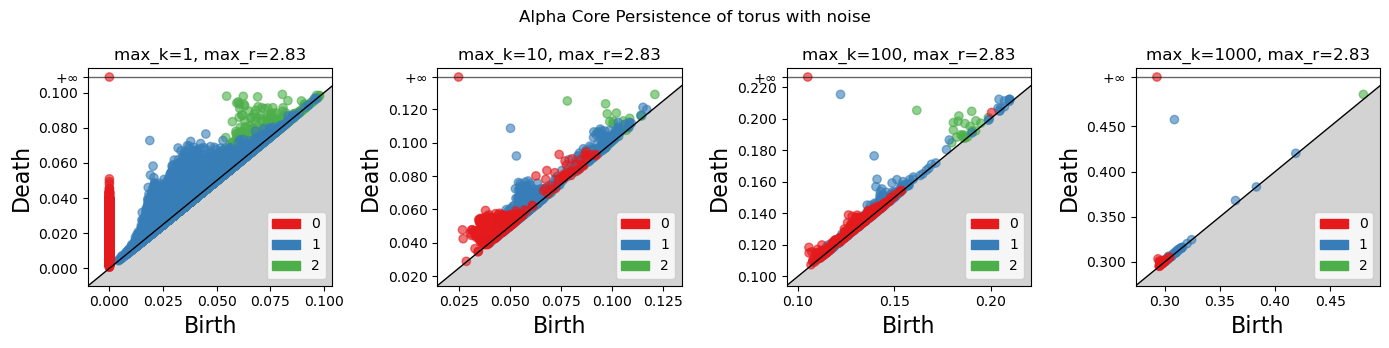

In [6]:
max_ks = [1, 10, 100, 1000]
max_r = 2*math.sqrt(Miniball(X).squared_radius())

fig, axs = plt.subplots(ncols=len(max_ks), figsize=(14, 14 / len(max_ks)))
fig.suptitle("Alpha Core Persistence of torus with noise")
for i, max_k in enumerate(max_ks):
    st_alpha_core = alpha_core(points=X, k=max_k, max_r=max_r)
    gudhi.plot_persistence_diagram(st_alpha_core.persistence(), axes=axs[i])
    axs[i].set_title(f"max_k={max_k}, max_r={max_r:.2f}")
fig.tight_layout()
plt.show()